# Time Series Analysis

This is my note about time series analysis from DataCamp.com

   * Merging Time Series With Different Dates
   * Correlation, autocorrelation function
   * Linear Regression 
   * Random Walk
   * Stationarity, autoregressive (AR) Models
   * Moving Average (MA) Model
   * ARMA model
   * Cointegration Models

In [3]:
# Import 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the statsmodels module
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

In [20]:
# load data 
amzn = pd.read_csv('data_time/AMZN.csv')
amzn['Date'] = pd.to_datetime(amzn['Date'],format = '%m/%d/%Y')
amzn = amzn.set_index('Date')
amzn.head(2)

,Adj Close
Date,
1997-05-15,1.958333
1997-05-16,1.729167


In [74]:
DJI = pd.read_csv('data_time/DJI.csv')
DJI['Date'] = pd.to_datetime(DJI['Date'],format = '%Y').dt.year
DJI = DJI.set_index('Date')
DJI.head(2)

,Value
Date,
1941,110.96
1942,119.40


In [55]:
hrb = pd.read_csv('data_time/HRB.csv')
hrb.index =  pd.PeriodIndex(year=hrb.Quarter.str[:4].astype(int), quarter=hrb.Quarter.str[-1].astype(int))
hrb.head(2)

,Quarter,Earnings
2007Q1,2007Q1,-0.36
2007Q2,2007Q2,-0.38


In [45]:
nytemp = pd.read_csv('data_time/NY_temperature.csv')
nytemp['DATE'] = pd.to_datetime(nytemp['DATE'],format = '%Y').dt.year
nytemp = nytemp.set_index('DATE')
nytemp.head(2)

,TAVG
DATE,
1870,53.8
1871,51.3


In [75]:
UFO = pd.read_csv('data_time/UFO.csv')
UFO['Date'] = pd.to_datetime(UFO['Date'],format = '%Y').dt.year
UFO = UFO.set_index('Date')
UFO.head(2)

,Value
Date,
1941,1
1942,2


## Merging Time Series With Different Dates

Stock and bond markets in the U.S. are closed on different days. For example, although the bond market is closed on Columbus Day (around Oct 12) and Veterans Day (around Nov 11), the stock market is open on those days. One way to see the dates that the stock market is open and the bond market is closed is to convert both indexes of dates into sets and take the difference in sets.

The pandas .join() method is a convenient tool to merge the stock and bond DataFrames on dates when both markets are open

In [ ]:
# Import pandas
import pandas as pd

# Convert the stock index and bond index into sets
set_stock_dates = set(stocks.index)
set_bond_dates = set(bonds.index)

# Take the difference between the sets and print
print(set_stock_dates - set_bond_dates)

# Merge stocks and bonds DataFrames using join()
stocks_and_bonds = stocks.join(bonds, how='inner' )

## Correlation of Stocks and Bonds
Investors are often interested in the correlation between the returns of two different assets for asset allocation and hedging purposes. In this exercise, you'll try to answer the question of whether stocks are positively or negatively correlated with bonds. Scatter plots are also useful for visualizing the correlation between the two variables.

Keep in mind that you should compute the correlations on the percentage changes rather than the levels.

Stock prices and 10-year bond yields are combined in a DataFrame called stocks_and_bonds under columns SP500 and US10Y



In [64]:
# load bond data
bonds = pd.read_csv('data_time/10ybond.csv',skiprows=15)
bonds['date'] = pd.to_datetime(bonds['date'])
bonds = bonds.set_index('date')
bonds.columns = ['US10Y']
bonds.head(2)

,US10Y
date,
1962-01-02,4.06
1962-01-03,4.03


In [70]:
# load bond data
sp500 = pd.read_csv('data_time/sp500.csv')
sp500['Date'] = pd.to_datetime(sp500['Date'])
sp500 = sp500.set_index('Date')
sp500 = pd.DataFrame(sp500['Close'])
sp500.columns = ['SP500']
sp500.head(2)

,SP500
Date,
2019-03-05,2789.649902
2019-03-06,2771.449951


In [71]:
stocks_and_bonds = bonds.merge(sp500, left_index=True, right_index=True, how='outer')

In [72]:
stocks_and_bonds.head()

,US10Y,SP500
1962-01-02,4.06,NaN
1962-01-03,4.03,NaN
1962-01-04,3.99,NaN
1962-01-05,4.02,NaN
1962-01-08,4.03,NaN


Correlation of stocks and interest rates:  0.7128361342462127


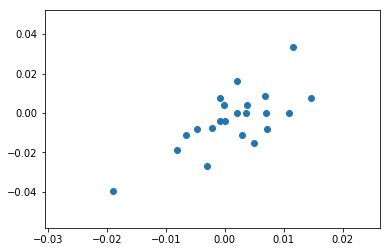

In [73]:
# Compute percent change using pct_change()
returns = stocks_and_bonds.pct_change()

# Compute correlation using corr()
correlation = returns['SP500'].corr(returns['US10Y'])
print("Correlation of stocks and interest rates: ", correlation)

# Make scatter plot
plt.scatter(returns['SP500'],returns['US10Y'])
plt.show()

Two trending series may show a strong correlation even if they are completely unrelated. This is referred to as "spurious correlation". That's why when you look at the correlation of say, two stocks, you should look at the correlation of their returns and not their levels.

To illustrate this point, calculate the correlation between the levels of the stock market and the annual sightings of UFOs. Both of those time series have trended up over the last several decades, and the correlation of their levels is very high. Then calculate the correlation of their percent changes. This will be close to zero, since there is no relationship between those two series.

In [78]:
levels = DJI.merge(UFO, left_index=True, right_index=True)
levels.columns = ['DJI','UFO']
levels.head()

,DJI,UFO
Date,,
1941,110.96,1
1942,119.40,2
1943,135.89,9
1944,152.32,9
1945,192.91,9


In [79]:
# Compute correlation of levels
correlation1 = levels.DJI.corr(levels.UFO)
print("Correlation of levels: ", correlation1)

# Compute correlation of percent changes
changes = levels.pct_change()
correlation2 = changes.DJI.corr(changes.UFO)
print("Correlation of changes: ", correlation2)

Correlation of levels:  0.9399762210726432
Correlation of changes:  0.06026935462405376


## Linear Regression

There are many choices to perform linear regression. The syntax may differ across the package.

In [ ]:
# in statesmodels 

import statsmodels.api as sm
sm.OLS(y, x).fit()

# in numpy 
np.polyfit(x, y, deg=1)

# in pandas 
pd.ols(y, x)

# in scipy

from scipy import stats
stats.linregress(x, y)

Example in statsmodels

In [95]:
import statsmodels.api as sm

In [96]:
stocks_and_bonds.head()

,US10Y,SP500
1962-01-02,4.06,NaN
1962-01-03,4.03,NaN
1962-01-04,3.99,NaN
1962-01-05,4.02,NaN
1962-01-08,4.03,NaN


In [98]:
# compute the percent change 
stocks_and_bonds['US10Y_pct'] = stocks_and_bonds['US10Y'].pct_change()
stocks_and_bonds['SP500_pct'] = stocks_and_bonds['SP500'].pct_change()

In [99]:
# add a columns of one so the regression fit the model with intercept
stocks_and_bonds = sm.add_constant(stocks_and_bonds)

C:\Users\Benny\Anaconda3\envs\fastai\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [108]:
stocks_and_bonds = stocks_and_bonds.dropna()
stocks_and_bonds.head()

,const,US10Y,SP500,US10Y_pct,SP500_pct
2019-03-06,1.0,2.69,2771.449951,-0.011029,-0.006524
2019-03-07,1.0,2.64,2748.929932,-0.018587,-0.008126
2019-03-08,1.0,2.62,2743.070068,-0.007576,-0.002132
2019-03-11,1.0,2.64,2783.300049,0.007634,0.014666
2019-03-12,1.0,2.61,2791.520020,-0.011364,0.002953


In [109]:
# use the bonds price to pridict the SP500 prices
results = sm.OLS(stocks_and_bonds['US10Y_pct'],stocks_and_bonds[['const','SP500_pct']]).fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:              US10Y_pct   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     19.64
Date:                Fri, 05 Apr 2019   Prob (F-statistic):           0.000286
Time:                        11:20:48   Log-Likelihood:                 66.034
No. Observations:                  21   AIC:                            -128.1
Df Residuals:                      19   BIC:                            -126.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0056      0.002     -2.293      0.0

SP500_pct is the slope and const is the intercept 

In [117]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)
print('R2: ', results.rsquared)

Parameters:  const       -0.005588
SP500_pct    1.439774
dtype: float64
R2:  0.5082577182185987


There is a relaionship between rsquared and correlation. 

(corr(x,y))^2 = R^2 

sign(corr) = sign of regression slope 

###  Looking at a Regression's R-Squared
R-squared measures how closely the data fit the regression line, so the R-squared in a simple regression is related to the correlation between the two variables. In particular, the magnitude of the correlation is the square root of the R-squared and the sign of the correlation is the sign of the regression coefficient.

In this exercise, you will start using the statistical package statsmodels, which performs much of the statistical modeling and testing that is found in R and software packages like SAS and MATLAB.

You will take two series, x and y, compute their correlation, and then regress y on x using the function OLS() in the statsmodels.api library. Most linear regressions contain a constant term which is the intercept (the α in the regression yt=α+βxt+ϵt). To include a constant using the function OLS(), you need to add a column of 1's to the right hand side of the regression.

In [ ]:
# Import the statsmodels module
import statsmodels.api as sm

# Compute correlation of x and y
correlation = x.corr(y)
print("The correlation between x and y is %4.2f" %(correlation))

# Convert the Series x to a DataFrame and name the column x
x = pd.DataFrame(x, columns=['x'])

# Add a constant to the DataFrame x
x = sm.add_constant(x)

# Fit the regression of y on x
result = sm.OLS(y,x).fit()

# Print out the results and look at the relationship between R-squared and the correlation above
print(result.summary())

# Autocorrelation

Interpretation of autocorrelation: negative autocorrelation is mean reverting. positive autocorrelation is trend following.

For stocks with historically has negative autocorrelation the strategy is to buy stocks that has drop over the last week and sell stock that have gone up (buy losers and sell winners). 

For commodities and currencies, they historically have positive autocorrelation. The strategy is to buy those that have gone up over last months and sell those that have gone down.

**Example**

One puzzling anomaly with stocks is that investors tend to overreact to news. Following large jumps, either up or down, stock prices tend to reverse. This is described as mean reversion in stock prices: prices tend to bounce back, or revert, towards previous levels after large moves, which are observed over time horizons of about a week. A more mathematical way to describe mean reversion is to say that stock returns are negatively autocorrelated.

This simple idea is actually the basis for a popular hedge fund strategy. 

You'll look at the autocorrelation of weekly returns of MSFT stock from 2012 to 2017. You'll start with a DataFrame MSFT of daily prices. You should use the .resample() method to get weekly prices and then compute returns from prices. Use the pandas method .autocorr() to get the autocorrelation and show that the autocorrelation is negative. Note that the .autocorr() method only works on Series, not DataFrames (even DataFrames with one column), so you will have to select the column in the DataFrame.

Note that autocorrelation function in pandas actually means the correlation between the data and the data with lag 1 index. 

In [80]:
MSFT = pd.read_csv('data_time/MSFT.csv')
MSFT['Date'] = pd.to_datetime(MSFT['Date'])
MSFT.set_index('Date',inplace=True)
MSFT.head(2)

,Adj Close
Date,
2012-08-06,26.107651
2012-08-07,26.377876


In [81]:
# Convert the daily data to weekly data
MSFT = MSFT.resample(rule='w').last()

# Compute the percentage change of prices
returns = MSFT.pct_change()

# Compute and print the autocorrelation of returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly returns is %4.2f" %(autocorrelation))

The autocorrelation of weekly returns is -0.16


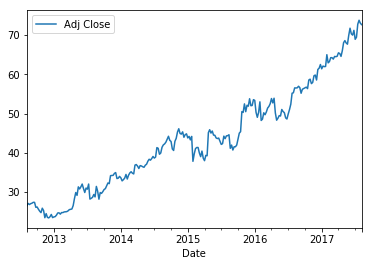

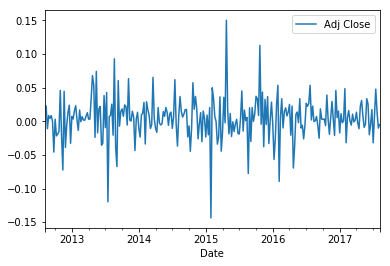

In [82]:
fig = MSFT.plot()
fig = returns.plot()

**Are Interest Rates Autocorrelated?**

When you look at daily changes in interest rates, the autocorrelation is close to zero. However, if you resample the data and look at annual changes, the autocorrelation is negative. This implies that while short term changes in interest rates may be uncorrelated, long term changes in interest rates are negatively autocorrelated. A daily move up or down in interest rates is unlikely to tell you anything about interest rates tomorrow, but a move in interest rates over a year can tell you something about where interest rates are going over the next year. And this makes some economic sense: over long horizons, when interest rates go up, the economy tends to slow down, which consequently causes interest rates to fall, and vice versa.

The DataFrame daily_data contains daily data of 10-year interest rates from 1962 to 2017.

In [92]:
# load bond data
bonds = pd.read_csv('data_time/10ybond.csv',skiprows=15)
bonds['date'] = pd.to_datetime(bonds['date'])
bonds = bonds.set_index('date')
bonds.columns = ['US10Y']
bonds.head(2)

,US10Y
date,
1962-01-02,4.06
1962-01-03,4.03


In [89]:
# load interest rate
interest = pd.read_csv('data_time/fed-interest.csv',skiprows=15)
interest['date'] = pd.to_datetime(interest['date'])
interest = interest.set_index('date')
interest.columns = ['rates']
interest.head(2)

,rates
date,
1954-07-01,1.13
1954-07-02,1.25


In [94]:
# Compute the daily change in bonds rates 
bonds['change_rates'] = bonds.diff()

# Compute and print the autocorrelation of daily changes
autocorrelation_daily = bonds['change_rates'].autocorr()
print("The autocorrelation of daily bonds rate changes is %4.2f" %(autocorrelation_daily))

# Convert the daily data to annual data
annual_data = bonds['US10Y'].resample(rule='A').agg('last')

# Repeat above for annual data
annual_data['diff_rates'] = annual_data.diff()
autocorrelation_annual = annual_data['diff_rates'].autocorr()
print("The autocorrelation of annual bonds rate changes is %4.2f" %(autocorrelation_annual))

The autocorrelation of daily bonds rate changes is 0.07
The autocorrelation of annual bonds rate changes is -0.22


# Autocorrelation function (ACF)

This is autocorrelation as a function of the lag. Any significant non-zero autocorrelations implies that the series can be forecast from the past. 

Autocorrelation also help choosing the model.

syntax: plot_acf(x, lags= 20, alpha=0.05)

Alpha is the width of the confident interval. If want to turn off use alpha=1.

* The interpretation for alpha = 0.05 is there is a 5% chance that the sample autocorrlation will fall outside that window.
* Confident intervals are wider if alpha is lower or fewer observation. 
* Under some simplifying assumptions, 95% confidence bands are ±2/$\sqrt{N}$when N is the number of observation.

In the last chapter, you computed autocorrelations with one lag. Often we are interested in seeing the autocorrelation over many lags (also called series correlation). The quarterly earnings for H&R Block (ticker symbol HRB) is plotted on the right, and you can see the extreme cyclicality of its earnings. A vast majority of its earnings occurs in the quarter that taxes are due.


You will compute the array of autocorrelations for the H&R Block quarterly earnings that is pre-loaded in the DataFrame HRB. Then, plot the autocorrelation function using the plot_acf module. This plot shows what the autocorrelation function looks like for cyclical earnings data. The ACF at lag=0 is always one, of course. In the next exercise, you will learn about the confidence interval for the ACF, but for now, suppress the confidence interval by setting alpha=1.

In [118]:
hrb = pd.read_csv('data_time/HRB.csv')
hrb.index =  pd.PeriodIndex(year=hrb.Quarter.str[:4].astype(int), quarter=hrb.Quarter.str[-1].astype(int))
hrb.head(2)

,Quarter,Earnings
2007Q1,2007Q1,-0.36
2007Q2,2007Q2,-0.38


In [123]:
HRB = pd.read_csv('data_time/HRB.csv')
HRB['Quarter'] = pd.to_datetime(HRB['Quarter'].str[:4]+
                                '-0'+HRB['Quarter'].str[5]+'-01')
HRB.set_index('Quarter',inplace=True)

In [124]:
HRB.head()

,Earnings
Quarter,
2007-01-01,-0.36
2007-02-01,-0.38
2007-03-01,0.07
2007-04-01,1.85
2008-01-01,-0.34


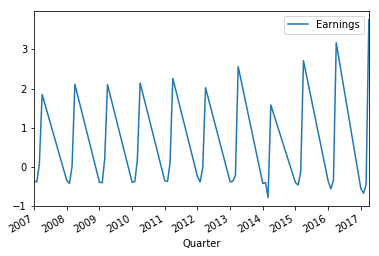

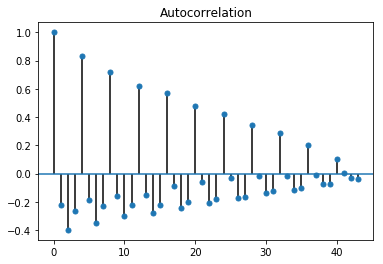

In [125]:
# Import the acf module and the plot_acf module from statsmodels
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

HRB.plot()

# Compute the acf array of HRB
acf_array = acf(HRB.Earnings)
# Plot the acf function
plot_acf(HRB, alpha=1)
plt.show()

**Are We Confident This Stock is Mean Reverting?**

In the last chapter, you saw that the autocorrelation of MSFT's weekly stock returns was -0.16. That autocorrelation seems large, but is it statistically significant? In other words, can you say that there is less than a 5% chance that we would observe such a large negative autocorrelation if the true autocorrelation were really zero? And are there any autocorrelations at other lags that are significantly different from zero?

Even if the true autocorrelations were zero at all lags, in a finite sample of returns you won't see the estimate of the autocorrelations exactly zero. In fact, the standard deviation of the sample autocorrelation is 1/$\sqrt{N}$ where N is the number of observations, so if N=100, for example, the standard deviation of the ACF is 0.1, and since 95% of a normal curve is between +1.96 and -1.96 standard deviations from the mean, the 95% confidence interval is ±1.96/$\sqrt{N}$. This approximation only holds when the true autocorrelations are all zero.

In [45]:
MSFT = pd.read_csv('data_time/MSFT.csv')
MSFT['Date'] = pd.to_datetime(MSFT['Date'])
MSFT.set_index('Date',inplace=True)

# Convert the daily data to weekly data
MSFT = MSFT.resample(rule='w').last()

# Compute the percentage change of prices
returns = MSFT.pct_change().dropna()

The autocorrelation of weekly MSFT returns is -0.16
The approximate confidence interval is +/- 0.12


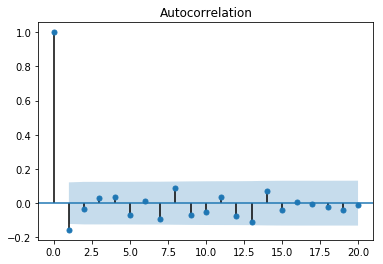

In [46]:
# Import the plot_acf module from statsmodels and sqrt from math
from statsmodels.graphics.tsaplots import plot_acf
from math import sqrt

# Compute and print the autocorrelation of MSFT weekly returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly MSFT returns is %4.2f" %(autocorrelation))

# Find the number of observations by taking the length of the returns DataFrame
nobs = len(returns)

# Compute the approximate confidence interval
conf = 1.96/sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))

# Plot the autocorrelation function with 95% confidence intervals and 20 lags using plot_acf
plot_acf(returns, alpha=0.05, lags=20)
plt.show()

Notice that the autocorrelation with lag 1 is significantly negative,but none of the other lags are significantly different from zero

# Random Walk

White noise has autocorrelation of zero. 

Can't Forecast White Noise
A white noise time series is simply a sequence of uncorrelated random variables that are identically distributed. Stock returns are often modelled as white noise. Unfortunately, for white noise, we cannot forecast future observations based on the past - autocorrelations at all lags are zero.

You will generate a white noise series and plot the autocorrelation function to show that it is zero for all lags. You can use np.random.normal() to generate random returns. For a Gaussian white noise process, the mean and standard deviation describe the entire process.

Plot this white noise series to see what it looks like, and then plot the autocorrelation function.

The mean is 0.022 and the standard deviation is 0.049


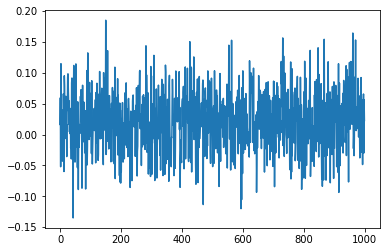

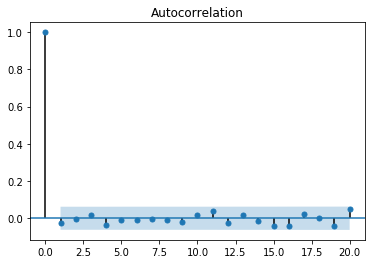

In [133]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Simulate white noise returns
returns = np.random.normal(loc=0.02, scale=0.05, size=1000)

# Print out the mean and standard deviation of returns
mean = np.mean(returns)
std = np.std(returns)
print("The mean is %5.3f and the standard deviation is %5.3f" %(mean,std))

# Plot returns series
plt.plot(returns)
plt.show()

# Plot autocorrelation function of white noise returns
plot_acf(returns, lags=20)
plt.show()

## Test Random Walk

For a random walk: 
* Today price = yesterday price + noise
Pt = P(t-1) + et 
* change in price is white noise 
Pt - P(t-1) = et 
* cannot forcast a random walk.

For a random walk with drift: 
* today price Pt = P(t-1) + et + $\mu$
* change in price Pt - P(t-1) = et $\mu$, so it has a mean of $\mu$

To test whether the data ia a random walk, you can regress current prices on a lagged prices. (Dicky-Fuller test, if included more lags called Augmented Dickey-Fuller test) 

Pt = alpha + beta P(t-1) + et

if beta = 1 it is a random walk
if beta < 1 is not a random walk

Equivalently, we can regress the change in prices.
Pt - P(t-1) = alpha + beta P(t-1) + et 

if beta = 0 it is a random walk and if beta < 0, then not a random walk. 

This is easily test using adfuller function. We are interested in the p value. If the p value is < 5% then the series is not a random walk with 95% confident. 

In [ ]:
from statsmodels.tsa.stattools import adfuller
adfuller(x)

In [134]:
results = adfuller(stocks_and_bonds['SP500'])

C:\Users\Benny\Anaconda3\envs\fastai\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [138]:
results[1]

0.958532086060056

The p value is much higher than 0.05, then it is a random walk. 

**Generate a random walk**


Whereas stock returns are often modeled as white noise, stock prices closely follow a random walk. In other words, today's price is yesterday's price plus some random noise.

Simulate the price of a stock over time that has a starting price of 100 and every day goes up or down by a random amount. Then, plot the simulated stock price. 

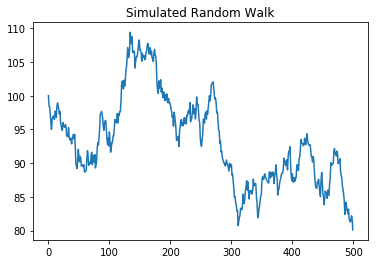

In [141]:
# Generate 500 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=1, size=500)

# Set first element to 0 so that the first price will be the starting stock price
steps[0]=0

# Simulate stock prices, P with a starting price of 100
P = 100 + np.cumsum(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk")
plt.show()

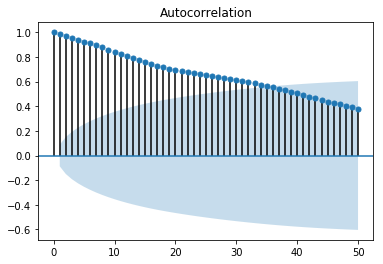

In [142]:
plot_acf(P,lags=50)
plt.show()

**Random Walk with Drift** 

* Many time series, like stock prices, are random walks but tend to drift up over time.
* In the plot above, the noise in the random walk was additive: random, normal changes in price were added to the last price. However, when adding noise, you could theoretically get negative prices.
* Now make the noise multiplicative:  add one to the random, normal changes to get a total return, and multiply that by the last price.

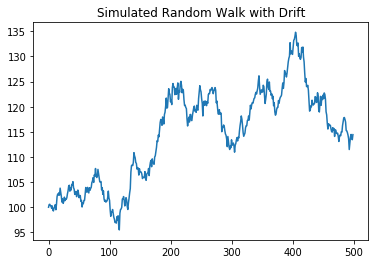

In [139]:
# Generate 500 random steps
steps = np.random.normal(loc=0.001, scale=0.01, size=500) + 1

# Set first element to 1
steps[0]=1

# Simulate the stock price, P, by taking the cumulative product
P = 100 * np.cumprod(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk with Drift")
plt.show()

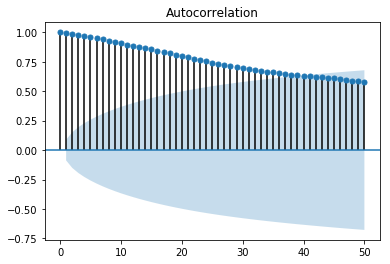

In [140]:
plot_acf(P,lags=50)
plt.show()

**Are Stock Prices a Random Walk?**

Most stock prices follow a random walk (perhaps with a drift). You will look at a time series of Amazon stock prices, pre-loaded in the DataFrame AMZN, and run the 'Augmented Dickey-Fuller Test' from the statsmodels library to show that it does indeed follow a random walk.

With the ADF test, the "null hypothesis" (the hypothesis that we either reject or fail to reject) is that the series follows a random walk. Therefore, a low p-value (say less than 5%) means we can reject the null hypothesis that the series is a random walk.

A note on a null(ifiable) hypothesis The null hypothesis states there is no relationship between the measured phenomenon (the dependent variable) and the independent variable. You do not need to believe that the null hypothesis is true to test it. On the contrary, you will likely suspect that there is a relationship between a set of variables. One way to prove that this is the case is to reject the null hypothesis. 

In [53]:
AMZN = pd.read_csv('data_time/AMZN.csv')
AMZN['Date'] = pd.to_datetime(AMZN['Date'])
AMZN.set_index('Date',inplace=True)

In [54]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Run the ADF test on the price series and print out the results
results = adfuller(AMZN['Adj Close'])
print(results)

# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

(4.025168525770742, 1.0, 33, 5054, {'1%': -3.4316445438146865, '5%': -2.862112049726916, '10%': -2.5670745025321304}, 30308.64216426981)
The p-value of the test on prices is: 1.0


According to this test, we cannot reject the hypothesis that Amazon prices follow a random walk. So it probably follow random walk.

How About Stock Returns?
In the last exercise, you showed that Amazon stock prices, contained in the DataFrame AMZN follow a random walk. In this exercise. you will do the same thing for Amazon returns (percent change in prices) and show that the returns do not follow a random walk.

In [55]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Create a DataFrame of AMZN returns
AMZN_ret = AMZN.pct_change().dropna()

# Run the ADF test on the return series and print out the p-value
results = adfuller(AMZN_ret['Adj Close'])
print('The p-value of the test on returns is: ' + str(results[1]))

The p-value of the test on returns is: 2.565589808348563e-22


The p-value is extremely small, so we can easily reject the hypothesis that returns are a random walk at all levels of significance. So it is not a random walk. 

# Stationarity

Weak stationarity: means, variance and autocorrelation function do not depend on time. corr(Xt,Xt-tau) is only the function of the lag tau Sometimes the function itself is not stationary. But the diff or diff(4) is stationary. Note diff(4) mean difference with the lag of 4 not fourth order derivative.

random walk is non-stationary because the variance grows with time.


## Seasonal Adjustment During Tax Season
Many time series exhibit strong seasonal behavior. The procedure for removing the seasonal component of a time series is called seasonal adjustment. For example, most economic data published by the government is seasonally adjusted.

You saw earlier that by taking first differences of a random walk, you get a stationary white noise process. For seasonal adjustments, instead of taking first differences, you will take differences with a lag corresponding to the periodicity.

Look again at the ACF of H&R Block's quarterly earnings, and there is a clear seasonal component. The autocorrelation is high for lags 4,8,12,16,.... because of the spike in earnings every four quarters during tax season. Apply a seasonal adjustment by taking the fourth difference (four represents the periodicity of the series). Then compute the autocorrelation of the transformed series.

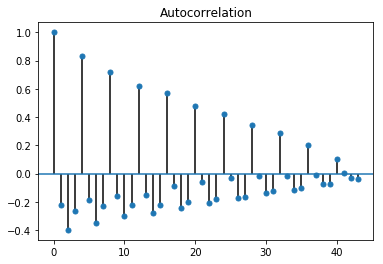

In [143]:
HRB = pd.read_csv('data_time/HRB.csv')
HRB['Quarter'] = pd.to_datetime(HRB['Quarter'].str[:4]+
                                '-0'+HRB['Quarter'].str[5]+'-01')
HRB.set_index('Quarter',inplace=True)

# Compute the acf array of HRB
acf_array = acf(HRB.Earnings)
# Plot the acf function
plot_acf(HRB, alpha=1)
plt.show()

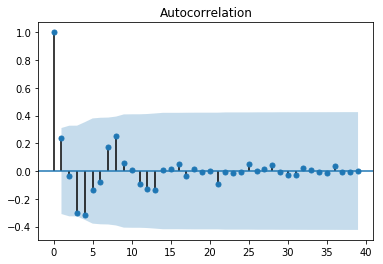

In [144]:
# Seasonally adjust quarterly earnings
# Drop the NaN data in the first three three rows
HRBsa = HRB.diff(4).dropna()

# Plot the autocorrelation function of the seasonally adjusted series
plot_acf(HRBsa)
plt.show()

# Autoregressive (AR) Models

* Today price Rt = mean + phi * R(t-1) + et 
* AR model of order 1, AR(1) 
* AR parameter is phi if phi is one, then it is a random walk, if phi is 0, then the process is white noise
* stationary process  -1 < phi < 1 
* negative phi = mean reversion (negative return )
* positive phi = trend following (positive return, momentum)

Simulating an AR Process in statsmodel

In [146]:
from statsmodels.tsa.arima_process import ArmaProcess

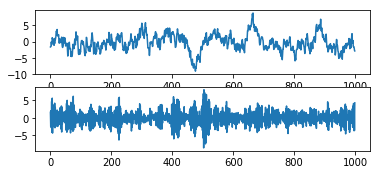

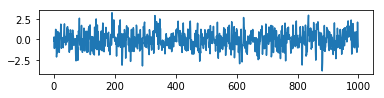

In [150]:
# Plot 1: AR parameter = +0.9
plt.subplot(3,1,1)
# include the zero lag coefficient = 1
# for phi = 0.9, put in -0.9 
ar1 = np.array([1, -0.9])
# put in the ma parameter
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: AR parameter = -0.9
plt.subplot(3,1,2)
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.show()

# Plot 2: AR parameter = +0.3
plt.subplot(3,1,3)
ar3 = np.array([1, -0.3])
ma3 = np.array([1])
AR_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = AR_object3.generate_sample(nsample=1000)
plt.plot(simulated_data_3)
plt.show()

The autocorrelation function decays exponentially for an AR time series at a rate of the AR parameter. For example, if the AR parameter, ϕ=+0.9, the first-lag autocorrelation will be 0.9, the second-lag will be (0.9)^2=0.81, the third-lag will be (0.9)^3=0.729, etc. A smaller AR parameter will have a steeper decay, and for a negative AR parameter, say -0.9, the decay will flip signs, so the first-lag autocorrelation will be -0.9, the second-lag will be (−0.9)2=0.81, the third-lag will be (−0.9)^3=−0.729, etc.

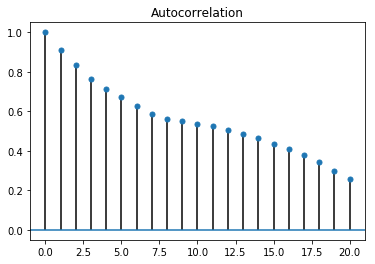

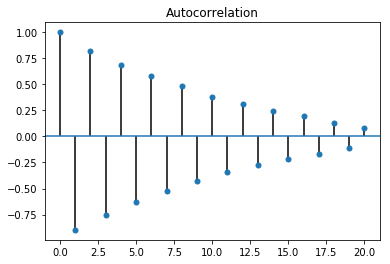

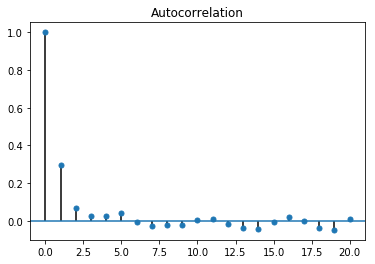

In [151]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot 1: AR parameter = +0.9
plot_acf(simulated_data_1, alpha=1, lags=20)
plt.show()

# Plot 2: AR parameter = -0.9
plot_acf(simulated_data_2, alpha=1, lags=20)
plt.show()

# Plot 3: AR parameter = +0.3
plot_acf(simulated_data_3, alpha=1, lags=20)
plt.show()

## Estimating and Forecasting an AR Model

In [152]:
from statsmodels.tsa.arima_model import ARMA

# fit to AR(1) so put order 1, then MA parameter 
mod = ARMA(simulated_data_1, order=(1,0))
result = mod.fit()

C:\Users\Benny\Anaconda3\envs\fastai\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Benny\Anaconda3\envs\fastai\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\Benny\Anaconda3\envs\fastai\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future

In [153]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1418.995
Method:                       css-mle   S.D. of innovations              0.999
Date:                Fri, 05 Apr 2019   AIC                           2843.989
Time:                        13:18:14   BIC                           2858.712
Sample:                             0   HQIC                          2849.585
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3456      0.357     -0.968      0.333      -1.045       0.354
ar.L1.y        0.9124      0.013     70.921      0.000       0.887       0.938
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0960           +0.0000j            1.0960            0.0000
-----------------------------------------------------------------------------
"""

In the simulated data Phi is +0.9

In [154]:
result.params # only show the coeff

array([-0.34559031,  0.9123701 ])

To forcast the result 

In [156]:
from statsmodels.tsa.arima_model import ARMA
# Fit an AR(1) model to the first simulated data
mod = ARMA(simulated_data_1, order=(1,0))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for phi
print("When the true phi=0.9, the estimate of phi (and the constant) are:")
print(res.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1418.995
Method:                       css-mle   S.D. of innovations              0.999
Date:                Fri, 05 Apr 2019   AIC                           2843.989
Time:                        13:24:33   BIC                           2858.712
Sample:                             0   HQIC                          2849.585
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3456      0.357     -0.968      0.333      -1.045       0.354
ar.L1.y        0.9124      0.013     70.921      0.000       0.887       0.938
                                    Roots           

#### Forecasting with an AR Model

You can also do forecasting, both in-sample and out-of-sample using statsmodels. The in-sample is a forecast of the next data point using the data up to that point, and the out-of-sample forecasts any number of data points in the future. These forecasts can be made using either the predict() method if you want the forecasts in the form of a series of data, or using the plot_predict() method if you want a plot of the forecasted data. You supply the starting point for forecasting and the ending point, which can be any number of data points after the data set ends.

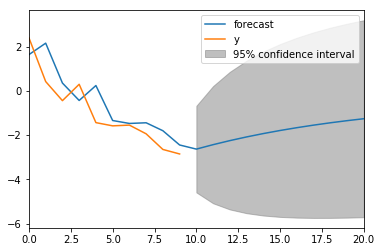

In [157]:
# start and end indecies have to be the same as the index system of the data 
# Forecast the first AR(1) model
mod = ARMA(simulated_data_1, order=(1,0))
res = mod.fit()
res.plot_predict(start=990, end=1010)
plt.show()

#### Forecast Interest Rates

Being able to forecast interest rates is of enormous importance, not only for bond investors but also for individuals like new homeowners who must decide between fixed and floating rate mortgages.

You saw in the first chapter that there is some mean reversion in interest rates over long horizons. In other words, when interest rates are high, they tend to drop and when they are low, they tend to rise over time. Currently they are below long-term rates, so they are expected to rise, but an AR model attempts to quantify how much they are expected to rise.

In [168]:
bonds.tail()

,US10Y,change_rates
date,,
2019-03-28,2.39,0.00
2019-03-29,2.41,0.02
2019-04-01,2.49,0.08
2019-04-02,2.48,-0.01
2019-04-03,2.52,0.04


In [170]:
# Convert the daily data to annual data
interest_rate_data = bonds['US10Y'].resample(rule='A').agg('last')

C:\Users\Benny\Anaconda3\envs\fastai\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\Users\Benny\Anaconda3\envs\fastai\lib\site-packages\statsmodels\tsa\base\tsa_model.py:342: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


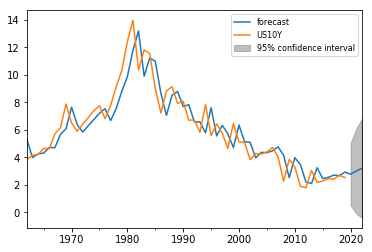

In [171]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast interest rates using an AR(1) model
mod = ARMA(interest_rate_data, order=(1,0))
res = mod.fit()

# Plot the original series and the forecasted series
res.plot_predict(start=0,end='2022')
plt.legend(fontsize=8)
plt.show()

### Compare AR Model with Random Walk

Sometimes it is difficult to distinguish between a time series that is slightly mean reverting and a time series that does not mean revert at all, like a random walk. You will compare the ACF for the slightly mean-reverting interest rate series of the last exercise with a simulated random walk with the same number of observations.

You should notice when plotting the autocorrelation of these two series side-by-side that they look very similar.

In [172]:
# Generate random walk with drift
steps = np.random.normal(loc=0, scale=1, size=500)

# Set first element to 0 so that the first price will be the starting stock price
steps[0]=0

# Simulate stock prices, P with a starting price of 100
P = 100 + np.cumsum(steps)

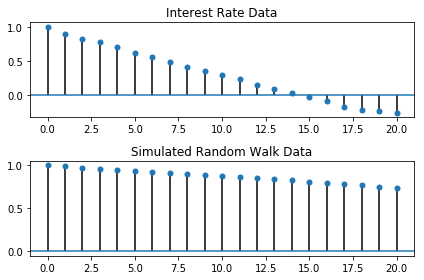

In [175]:

fig, axes = plt.subplots(2,1)

# Plot the autocorrelation of the interest rate series in the top plot
fig = plot_acf(interest_rate_data, alpha=1, lags=20, ax=axes[0])

# Plot the autocorrelation of the simulated random walk series in the bottom plot
fig = plot_acf(P, alpha=1, lags=20, ax=axes[1])

# Label axes
axes[0].set_title("Interest Rate Data")
axes[1].set_title("Simulated Random Walk Data")
plt.tight_layout()
plt.show()

## Identifying the Order of an AR Model

The order of an AR(p) model will usually be unknown

**Two techniques to determine order**: 

1. Partial Autocorrelation Function (PAF). PAF measured the incremental benefit of adding another lag. 
    * for AR(2), PACF with two lags are significantly different from zero.
    

2. Information criteria 
Information criteria: adjusts goodness-of-fit for number of parameters
Two popular adjusted goodness-of-fit measures: 
    * AIC (Akaike Information Criterion)
    * BIC (Bayesian Information Criterion)
    * They will be shown when fitting the AR model. Fit with different models and choose the one with lowest AIC and BIC. 

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

# Plot the PACF

plot_pacf(x, lags= 20, alpha=0.05)


In [177]:
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(simulated_data_1, order=(1,0))
result = mod.fit()
print(result.aic, result.bic)

2843.989153346112 2858.712419183058


### PACF 

In this exercise, you will simulate two time series, an AR(1) and an AR(2), and calculate the sample PACF for each. You will notice that for an AR(1), the PACF should have a significant lag-1 value, and roughly zeros after that. And for an AR(2), the sample PACF should have significant lag-1 and lag-2 values, and zeros after that.

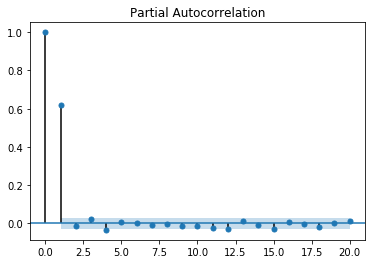

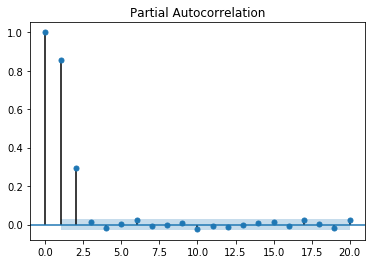

In [178]:
# Import the modules for simulating data and for plotting the PACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf

# Simulate AR(1) with phi=+0.6
ma = np.array([1])
ar = np.array([1, -0.6])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(1)
plot_pacf(simulated_data_1, lags=20)
plt.show()

# Simulate AR(2) with phi1=+0.6, phi2=+0.3
ma = np.array([1])
ar = np.array([1, -0.6, -0.3])
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(2)
plot_pacf(simulated_data_2, lags=20)
plt.show()

### Estimate Order of Model: Information Criteria
Another tool to identify the order of a model is to look at the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC). These measures compute the goodness of fit with the estimated parameters, but apply a penalty function on the number of parameters in the model. You will take the AR(2) simulated data from the last exercise, saved as simulated_data_2, and compute the BIC as you vary the order, p, in an AR(p) from 0 to 6.

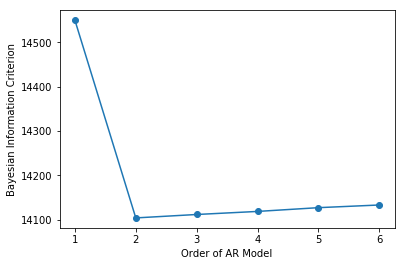

In [179]:
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima_model import ARMA

# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARMA(simulated_data_2, order=(p,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

# Moving Average (MA) Model

today value Rt = mean + noise et + fraction $\theta$ of yesterday noise et-1

Because we include the noise from lag 1, this is called MA model of order 1. 
* If MA parameter $\theta = 0$ the process is white noise 
* If $\theta $ is negative then the positive stock last period, will cause last period return to be positive, but this return to likely be negative (mean reversion). 
* If $\theta $ is positive, it's one period momentum
* stock two period ago would have no effect on today 
* lag 1 auto-correlation is $\theta/(1+ \theta ^2)$

High frequency stock returns are nice example of MA(1) process. 


simulate pure MA process

unlike the last chapter on AR models, the sign of the MA coefficients is what we would expect. For example, for an MA(1) process with θ=−0.9, the array representing the MA parameters would be ma = np.array([1, -0.9])

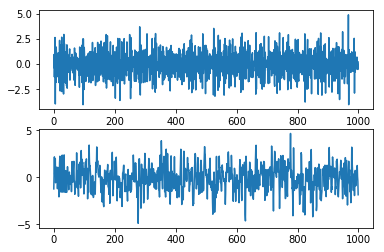

In [181]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: MA parameter = -0.9
plt.subplot(2,1,1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: MA parameter = +0.9
plt.subplot(2,1,2)
ar2 = np.array([1])
ma2 = np.array([1, +0.9])
MA_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = MA_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)

plt.show()

MA(1) model has no autocorrelation beyond lag 1. an MA(2) model has no autocorrelation beyond lag 2. The lag-1 autocorrelation for an MA(1) model is not θ, but rather θ/(1+θ2). For example, if the MA parameter, θ, is = +0.9, the first-lag autocorrelation will be 0.9/(1+(0.9)2)=0.497, and the autocorrelation at all other lags will be zero. If the MA parameter, θ, is -0.9, the first-lag autocorrelation will be −0.9/(1+(−0.9)2)=−0.497.

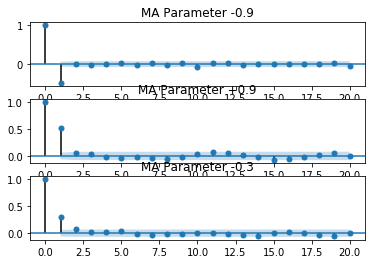

In [182]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot three ACF on same page for comparison using subplots
fig, axes = plt.subplots(3,1)

# Plot 1: AR parameter = -0.9
plot_acf(simulated_data_1, lags=20, ax=axes[0])
axes[0].set_title("MA Parameter -0.9")

# Plot 2: AR parameter = +0.9
plot_acf(simulated_data_2, lags=20, ax=axes[1])
axes[1].set_title("MA Parameter +0.9")

# Plot 3: AR parameter = -0.3
plot_acf(simulated_data_3, lags=20, ax=axes[2])
axes[2].set_title("MA Parameter -0.3")
plt.show()

### Forcasting an MA model 

Estimate the MA(1) parameter, θ, of one of the simulated series that you generated in the earlier exercise. Since the parameters are known for a simulated series, it is a good way to understand the estimation routines before applying it to real data.

In [185]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Fit an MA(1) model to the first simulated data
mod = ARMA(simulated_data_1, order=(0,1))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for theta
print("When the true theta=-0.9, the estimate of theta (and the constant) are:")
print(res.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1395.065
Method:                       css-mle   S.D. of innovations              0.975
Date:                Fri, 05 Apr 2019   AIC                           2796.131
Time:                        13:59:24   BIC                           2810.854
Sample:                             0   HQIC                          2801.727
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.002      0.119      0.905      -0.005       0.005
ma.L1.y       -0.9202      0.013    -69.463      0.000      -0.946      -0.894
                                    Roots           

Use MA models to forecast in-sample and out-of-sample data using statsmodels.

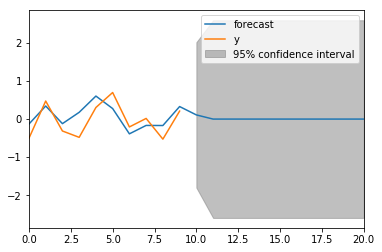

In [186]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast the first MA(1) model
mod = ARMA(simulated_data_1, order=(0,1))
res = mod.fit()
res.plot_predict(start=990, end=1010)
plt.show()

# ARMA model 

This is ARMA(1,1) model

Rt = mean + \theta R(t-1) + et + $\theta$ e(t-1)



#### High Frequency Stock Prices

Higher frequency stock data is well modelled by an MA(1) process, so it's a nice application of the models in this chapter.

The DataFrame intraday contains one day's prices (on September 1, 2017) for Sprint stock (ticker symbol "S") sampled at a frequency of one minute. The stock market is open for 6.5 hours (390 minutes), from 9:30am to 4:00pm.

Before you can analyze the time series data, you will have to clean it up a little, which you will do in this and the next two exercises. When you look at the first few rows (see the IPython Shell), you'll notice several things. First, there are no column headers.The data is not time stamped from 9:30 to 4:00, but rather goes from 0 to 390. And you will notice that the first date is the odd-looking "a1504272600". The number after the "a" is Unix time which is the number of seconds since January 1, 1970. This is how this dataset separates each day of intraday data.

In [193]:
intraday = pd.read_csv('data_time/Sprint_Intraday.txt', header=None)
intraday = intraday.iloc[:,[0,1]]
intraday.head()

,0,1
0,a1504272600,8.2900
1,1,8.2700
2,2,8.2800
3,3,8.2750
4,4,8.2875


In [194]:
intraday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 2 columns):
0    389 non-null object
1    389 non-null float64
dtypes: float64(1), object(1)
memory usage: 6.2+ KB


In [195]:
# import datetime module
import datetime

# Change the first date to zero
intraday.iloc[0,0] = 0

# Change the column headers to 'DATE' and 'CLOSE'
intraday.columns = ['DATE','CLOSE']

# Examine the data types for each column
print(intraday.dtypes)

# Convert DATE column to numeric
intraday['DATE'] = pd.to_numeric(intraday.DATE)

# Make the `DATE` column the new index
intraday = intraday.set_index('DATE')

DATE      object
CLOSE    float64
dtype: object


### More Data Cleaning: Missing Data

When you print out the length of the DataFrame intraday, you will notice that a few rows are missing. There will be missing data if there are no trades in a particular one-minute interval. One way to see which rows are missing is to take the difference of two sets: the full set of every minute and the set of the DataFrame index which contains missing rows. You can fill in the missing rows with the .reindex() method, convert the index to time of day, and then plot the data.

Stocks trade at discrete one-cent increments (although a small percentage of trades occur in between the one-cent increments) rather than at continuous prices, and when you plot the data you should observe that there are long periods when the stock bounces back and forth over a one cent range. This is sometimes referred to as "bid/ask bounce".

The length of the DataFrame is:  389
Missing rows:  {182, 14}


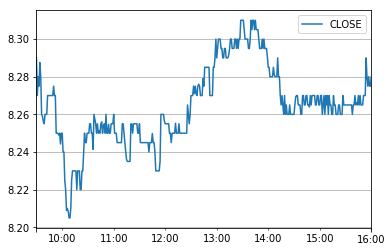

In [196]:
# Notice that some rows are missing
print("The length of the DataFrame is: ",len(intraday))

# Find the missing rows
print("Missing rows: ", set(range(391)) - set(intraday.index))

# Fill in the missing rows
intraday = intraday.reindex(range(391), method='ffill')

# Change the index to the intraday times
intraday.index = pd.date_range(start='2017-08-28 9:30', end='2017-08-28 16:00', freq='1min')

# Plot the intraday time series
intraday.plot(grid=True)
plt.show()

### Applying an MA Model

The bouncing of the stock price between bid and ask induces a negative first order autocorrelation, but no autocorrelations at lags higher than 1. You get the same ACF pattern with an MA(1) model. Therefore, you will fit an MA(1) model to the intraday stock data from the last exercise.

The first step is to compute minute-by-minute returns from the prices in intraday, and plot the autocorrelation function. You should observe that the ACF looks like that for an MA(1) process. Then, fit the data to an MA(1), the same way you did for simulated data.

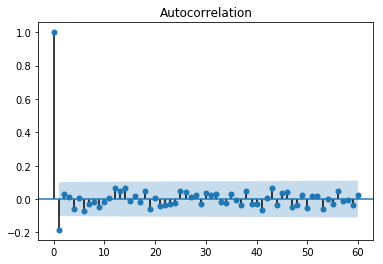

const         -0.000002
ma.L1.CLOSE   -0.179273
dtype: float64


In [197]:
# Import plot_acf and ARMA modules from statsmodels
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARMA

# Compute returns from prices and drop the NaN
returns = intraday.pct_change()
returns = returns.dropna()

# Plot ACF of returns with lags up to 60 minutes
plot_acf(returns, lags=60)
plt.show()

# Fit the data to an MA(1) model
mod = ARMA(returns, order=(0,1))
res = mod.fit()
print(res.params)

### Equivalence of AR(1) and MA(infinity)

To better understand the relationship between MA models and AR models, you will demonstrate that an AR(1) model is equivalent to an MA(∞) model with the appropriate parameters.

You will simulate an MA model with parameters 0.8,0.82,0.83,… for a large number (30) lags and show that it has the same Autocorrelation Function as an AR(1) model with ϕ=0.8.

C:\Users\Benny\Anaconda3\envs\fastai\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


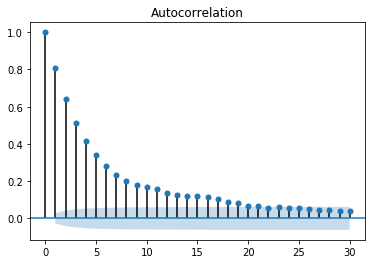

In [198]:
# import the modules for simulating data and plotting the ACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf

# Build a list MA parameters
ma = [0.8**i  for i in range(30)]

# Simulate the MA(30) model
ar = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=5000)

# Plot the ACF
plot_acf(simulated_data, lags=30)
plt.show()

# Cointegration Models

* Two series P and Q can be random walks and not forecastable, but linear combination of P and Q may not be a random walk and forecastable. 
* Then P and Q are cointegrated 
* Interpretation: some commodities are substitution of another ex: corn and sugar for sweetener. 


### Test for Cointegration

* Regress P on Q and get slope c
* Run Augmented Dickey-Fuller test on P - c Q to test for random walk 

You can use statsmodel coint that conbined these two steps. 

In [ ]:
from statsmodels.tsa.stattools import coint
coint(P,Q)

**The Heating Oil and Natural Gas prices**

First, plot both price series, which look like random walks. Then plot the difference between the two series, which should look more like a mean reverting series (to put the two series in the same units, we multiply the heating oil prices, in dolar/gallon, by 7.25, which converts it to dolar/millionBTU, which is the same units as Natural Gas).

In [208]:
HO = pd.read_csv('data_time/CME_HO1.csv')
HO['Date'] = pd.to_datetime(HO['Date'],format = '%m/%d/%Y')
HO = HO.set_index('Date')
HO = HO.sort_index()
HO.head(2)

,Close
Date,
1991-01-02,0.7330
1991-01-03,0.7024


In [209]:
NG = pd.read_csv('data_time/CME_NG1.csv')
NG['Date'] = pd.to_datetime(NG['Date'],format = '%m/%d/%Y')
NG = NG.set_index('Date')
NG = NG.sort_index()
NG.head(2)

,Close
Date,
1991-01-02,1.832
1991-01-03,1.782


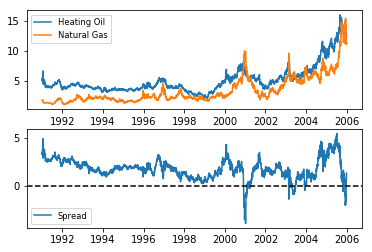

In [210]:
# Plot the prices separately
plt.subplot(2,1,1)
plt.plot(7.25*HO, label='Heating Oil')
plt.plot(NG, label='Natural Gas')
plt.legend(loc='best', fontsize='small')

# Plot the spread
plt.subplot(2,1,2)
plt.plot(7.25*HO-NG, label='Spread')
plt.legend(loc='best', fontsize='small')
plt.axhline(y=0, linestyle='--', color='k')
plt.show()

To verify that HO and NG are cointegrated, First apply the Dickey-Fuller test to HO and NG separately to show they are random walks. Then apply the test to the difference, which should strongly reject the random walk hypothesis. The Heating Oil and Natural Gas prices are pre-loaded in DataFrames HO and NG.

In [211]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Compute the ADF for HO and NG
result_HO = adfuller(HO.Close)
print("The p-value for the ADF test on HO is ", result_HO[1])
result_NG = adfuller(NG.Close)
print("The p-value for the ADF test on NG is ", result_NG[1])

# Compute the ADF of the spread
result_spread = adfuller(7.25 * HO.Close - NG.Close)
print("The p-value for the ADF test on the spread is ", result_spread[1])

The p-value for the ADF test on HO is  0.956710878501786
The p-value for the ADF test on NG is  0.9008747444676732
The p-value for the ADF test on the spread is  7.019439302142287e-05


Individual futures are random walks, but the spread is not a random walk.

### Are Bitcoin and Ethereum Cointegrated?

Cointegration involves two steps: regressing one time series on the other to get the cointegration vector, and then perform an ADF test on the residuals of the regression. In the last example, there was no need to perform the first step since we implicitly assumed the cointegration vector was (1,−1). In other words, we took the difference between the two series (after doing a units conversion). Here, you will do both steps.

Regress the value of one cryptocurrency, bitcoin (BTC), on another cryptocurrency, ethereum (ETH). If we call the regression coefficient b, then the cointegration vector is simply (1,−b). Then perform the ADF test on BTC −b ETH. Bitcoin and Ethereum prices are pre-loaded in DataFrames BTC and ETH.

Bitcoin data are in DataFrame BTC and Ethereum data are in ETH.

In [225]:
BTC = pd.read_csv('data_time/Bitcoin.csv')
BTC['Date'] = pd.to_datetime(BTC['Date'])
BTC = BTC.set_index('Date')
BTC = BTC.sort_index()
BTC = pd.DataFrame(BTC['Price'].str.replace(',','').astype(float))
BTC.head(2)

,Price
Date,
2017-03-05,1271.2
2017-03-06,1277.0


In [224]:
ETH = pd.read_csv('data_time/Ethereum.csv')
ETH['Date'] = pd.to_datetime(ETH['Date'])
ETH = ETH.set_index('Date')
ETH = ETH.sort_index()
ETH = pd.DataFrame(ETH['Price'].str.replace(',','').astype(float))
ETH.head(2)

,Price
Date,
2017-03-05,19.35
2017-03-06,19.51


In [226]:
# Import the statsmodels module for regression and the adfuller function
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Regress BTC on ETH
ETH = sm.add_constant(ETH)
result = sm.OLS(BTC,ETH).fit()

# Compute ADF
b = result.params[1]
adf_stats = adfuller(BTC['Price'] - b*ETH['Price'])
print("The p-value for the ADF test is ", adf_stats[1])

The p-value for the ADF test is  0.004278590379833397


 P value is low, thus Bitcoin and Ethereum are cointegrated.

# Case Study: Climate Change

Analyzing Temperature Data
* Test for Random Walk
* Take first differences
* Compute ACF and PACF
* Fit a few AR, MA, and ARMA models
* Use Information Criterion to choose best model
* Forecast temperature over next 30 years

In [236]:
temp_NY = pd.read_csv('data_time/NY_temperature.csv')
temp_NY['DATE'] = pd.to_datetime(temp_NY['DATE'],format = '%Y')
temp_NY = temp_NY.set_index('DATE')
temp_NY.head(2)

,TAVG
DATE,
1870-01-01,53.8
1871-01-01,51.3


In [237]:
temp_NY.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 147 entries, 1870-01-01 to 2016-01-01
Data columns (total 1 columns):
TAVG    147 non-null float64
dtypes: float64(1)
memory usage: 2.3 KB


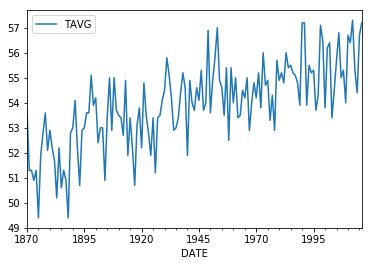

The p-value for the ADF test is  0.5832938987871106


In [238]:
# Import the adfuller function from the statsmodels module
from statsmodels.tsa.stattools import adfuller

# Plot average temperatures
temp_NY.plot()
plt.show()

# Compute and print ADF p-value
result = adfuller(temp_NY['TAVG'])
print("The p-value for the ADF test is ", result[1])

Is Temperature a Random Walk (with Drift)? Yes, the data seems to foloow a random walk with a drift.

Since the temperature series, temp_NY, is a random walk with drift, take first differences to make it stationary. Then compute the sample ACF and PACF. This will provide some guidance on the order of the model.

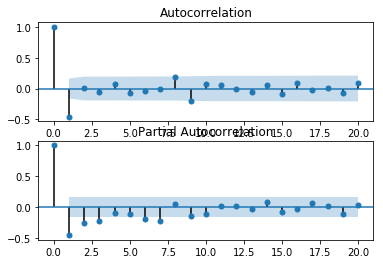

In [239]:
# Import the modules for plotting the sample ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Take first difference of the temperature Series
chg_temp = temp_NY.diff()
chg_temp = chg_temp.dropna()

# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2,1)

# Plot the ACF
plot_acf(chg_temp, lags=20, ax=axes[0])

# Plot the PACF
plot_pacf(chg_temp, lags=20, ax=axes[1])
plt.show()

There is no clear pattern in the ACF and PACF except the negative lag-1 autocorrelation in the ACF.

## Which ARMA Model is Best?

Fit the temperature data to an AR(1), AR(2), MA(1), and ARMA(1,1) and see which model is the best fit, using the AIC criterion.


In [240]:
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima_model import ARMA

# Fit the data to an AR(1) model and print AIC:
mod = ARMA(chg_temp, order=(1,0))
res = mod.fit()
print("The AIC for an AR(1) is: ", res.aic)

# Fit the data to an AR(2) model and print AIC:
mod = ARMA(chg_temp, order=(2,0))
res = mod.fit()
print("The AIC for an AR(2) is: ", res.aic)

# Fit the data to an MA(1) model and print AIC:
mod = ARMA(chg_temp, order=(0,1))
res = mod.fit()
print("The AIC for an MA(1) is: ", res.aic)

# Fit the data to an ARMA(1,1) model and print AIC:
mod = ARMA(chg_temp, order=(1,1))
res = mod.fit()
print("The AIC for an ARMA(1,1) is: ", res.aic)

C:\Users\Benny\Anaconda3\envs\fastai\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\Benny\Anaconda3\envs\fastai\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\Users\Benny\Anaconda3\envs\fastai\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\Benny\Anaconda3\envs\fastai\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\Benny\Anaconda3\envs\fastai\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarni

The AIC for an AR(1) is:  510.5346898313911
The AIC for an AR(2) is:  501.92741231602287
The AIC for an MA(1) is:  469.3909741274666
The AIC for an ARMA(1,1) is:  469.07291682369816


The MA(1) and ARMA(1,1) have the two lowest AIC values.

Forecast the temperature over the next 30 years using an ARMA(1,1) model, including confidence bands around that estimate. Keep in mind that the estimate of the drift will have a much bigger impact on long range forecasts than the ARMA parameters.

Earlier, you determined that the temperature data follows a random walk and you looked at first differencing the data. You will use the ARIMA module on the temperature data, pre-loaded in the DataFrame temp_NY, but the forecast would be the same as using the ARMA module on changes in temperature, and then using cumulative sums of these changes to get the temperature.

C:\Users\Benny\Anaconda3\envs\fastai\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\Benny\Anaconda3\envs\fastai\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\Benny\Anaconda3\envs\fastai\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


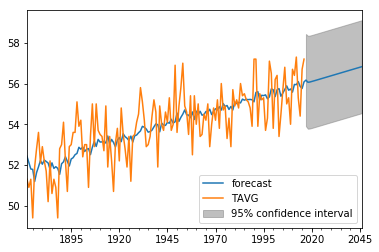

In [241]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima_model import ARIMA

# Forecast interest rates using an AR(1) model
#The d in order(p,d,q) is one, since we first differenced once
mod = ARIMA(temp_NY, order=(1,1,1))
res = mod.fit()

# Plot the original series and the forecasted series
res.plot_predict(start='1872-01-01', end='2046-01-01')
plt.show()